# Wine Quality Data Analysis project



# "How do various chemical properties influence the quality of red wine, and which factors are the most significant predictors of high-quality wine?"

Sub-Questions:

    Is there a significant correlation between alcohol content and wine quality?
    How does volatile acidity affect the perceived quality of wine?
    What is the distribution of residual sugar across different quality ratings?
    Which chemical properties are the strongest predictors in a linear regression model for wine quality?

**Import Libraries:**

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Load the Dataset:**

In [19]:
import pandas as pd

# Load the CSV file
file_path = ''
df = pd.read_csv('/content/WineQT.csv')

# Display the first few rows of the dataset
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


# Explore the Dataset

    Initial Exploration:

In [20]:
# Display the first few rows
print(df.head())

# Summary of the dataset
print(df.info())

# Descriptive statistics
print(df.describe())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

Data Cleaning:

##    Check for missing values:

In [21]:
print(df.isnull().sum())


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


# Visualization

    Visualize Data:

        Correlation heatmap:

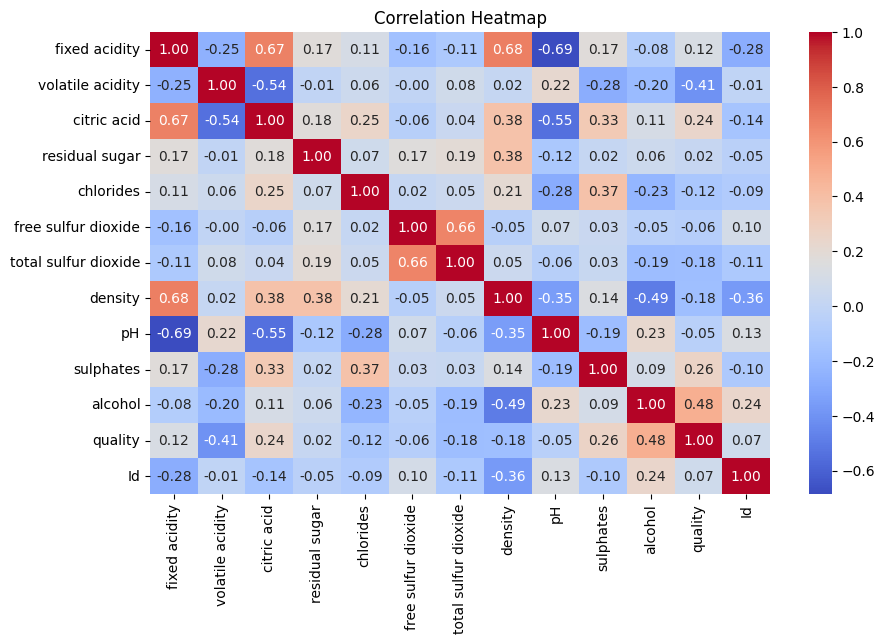

In [22]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


# Distribution of wine quality:
Count Plot: Shows the frequency of each quality rating in the dataset. This helps understand the balance of classes and whether the dataset is imbalanced.

<ipython-input-23-34e30e9ce800>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='quality', palette='viridis')


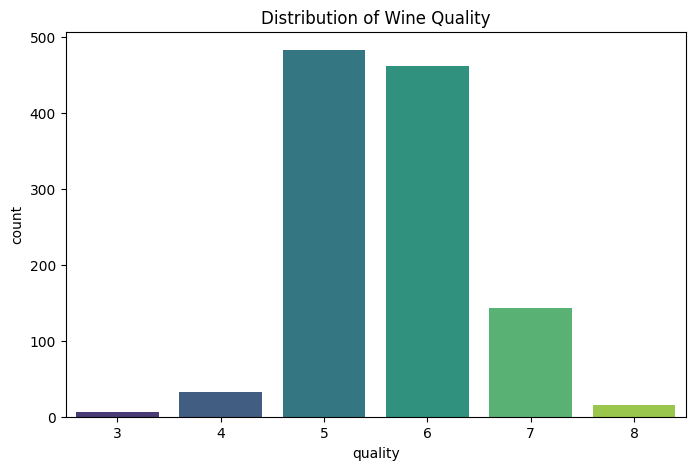

In [23]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='quality', palette='viridis')
plt.title('Distribution of Wine Quality')
plt.show()


# Alcohol content vs. quality:
Boxplot: Illustrates the distribution of alcohol content for each quality rating. It helps identify trends, such as whether higher alcohol content correlates with better quality

<ipython-input-24-0d4a8e2508b9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='quality', y='alcohol', palette='viridis')


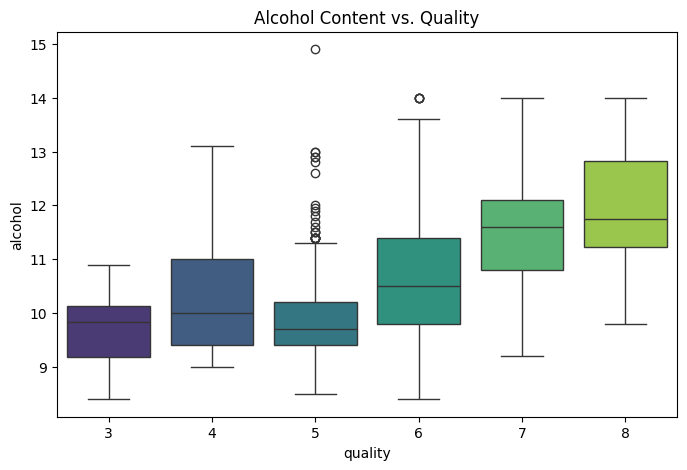

In [24]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='quality', y='alcohol', palette='viridis')
plt.title('Alcohol Content vs. Quality')
plt.show()


# Correlation Analysis
Correlation Heatmap: Visualizes the correlation coefficients between different features. Values close to 1 or -1 indicate strong positive or negative correlations, respectively. This helps identify which features are most related to wine quality.

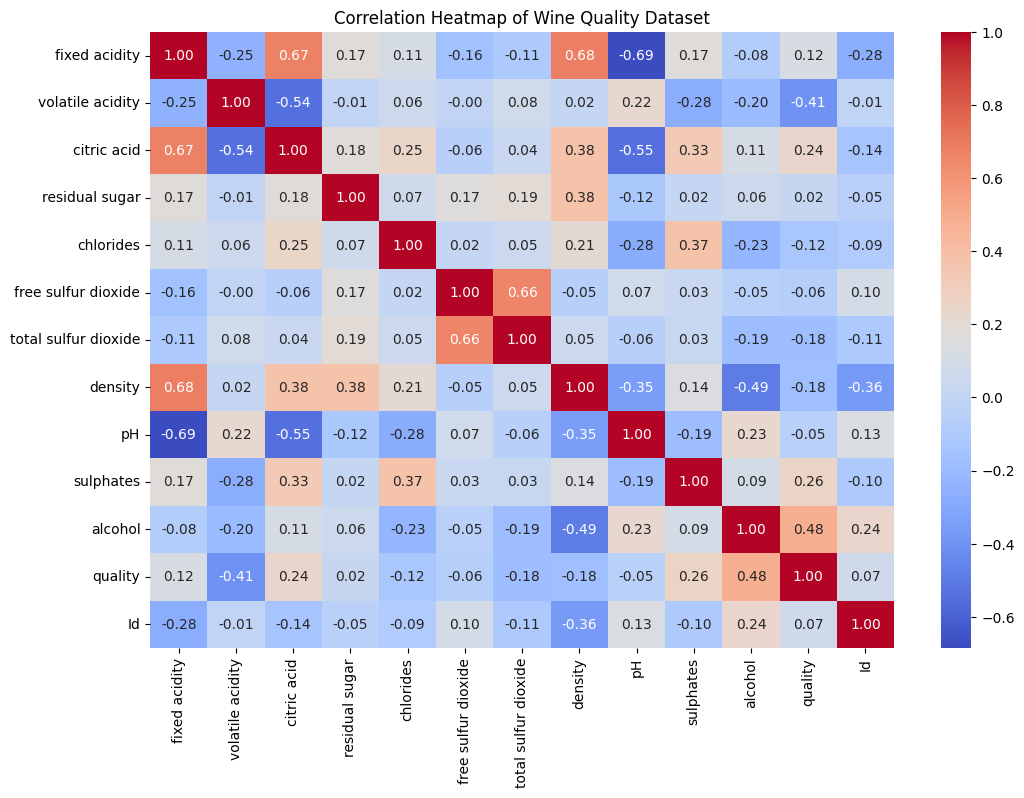

In [25]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Wine Quality Dataset')
plt.show()


# Pairplot of Selected Features
Pairplot: Provides scatter plots for each pair of selected features, colored by wine quality. This helps visualize potential relationships and clusters within the data.

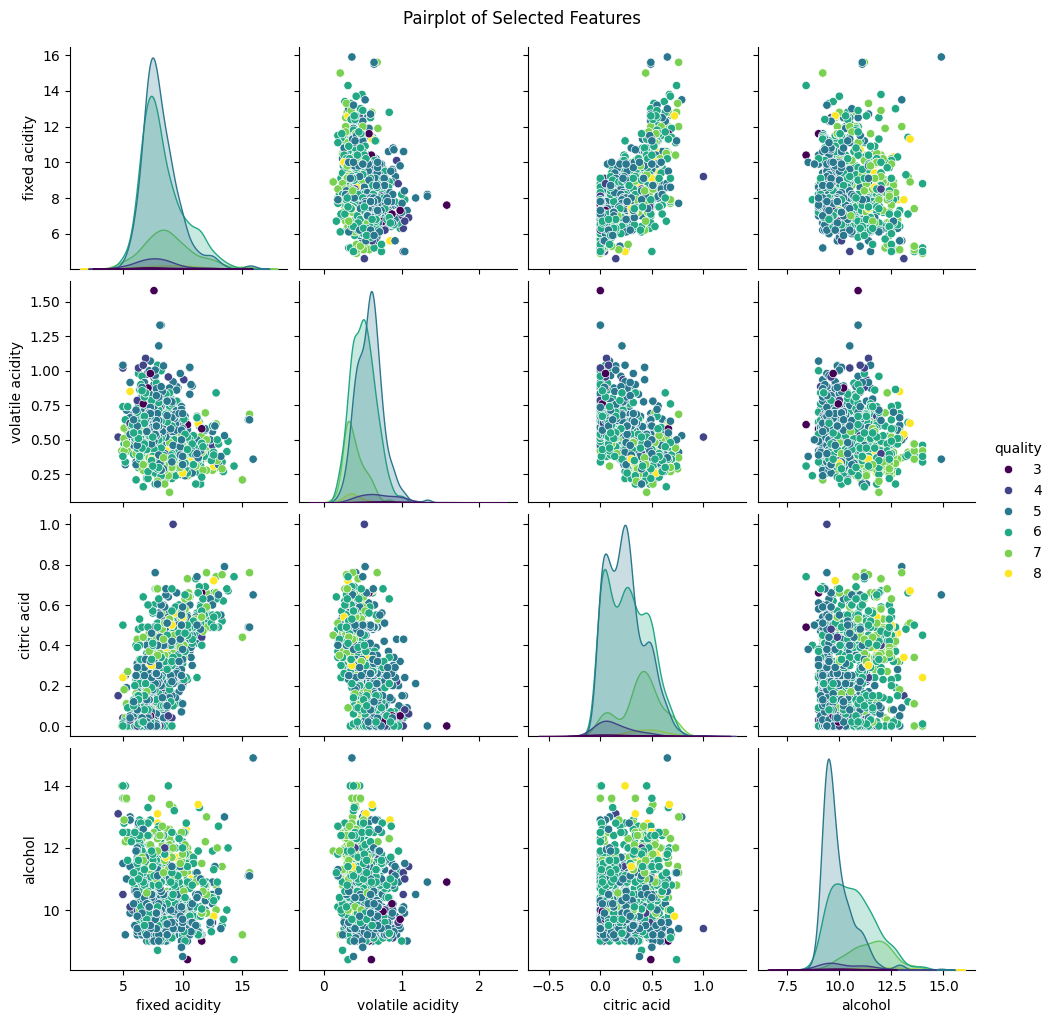

In [26]:
# Pairplot for selected features
selected_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'alcohol', 'quality']
sns.pairplot(df[selected_features], hue='quality', palette='viridis')
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()


# Feature Engineering
5.1 Creating a Quality Label

df.head(): Shows the first five rows of the updated DataFrame, now including the new quality_label column which categorizes the wine quality.

In [27]:
# Define quality labels
def quality_label(q):
    if q <= 4:
        return 'Low'
    elif q <= 7:
        return 'Medium'
    else:
        return 'High'

df['quality_label'] = df['quality'].apply(quality_label)

# Display the updated DataFrame
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,Medium
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1,Medium
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2,Medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3,Medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4,Medium


# 5.2 Encoding Categorical Variables

If you plan to perform machine learning tasks, encode the categorical labels.
Output Description:

    Label Encoding: Transforms categorical labels ('Low', 'Medium', 'High') into numerical values (e.g., 0, 1, 2) for machine learning algorithms.
    Label Mapping: Displays how each label is encoded.

In [28]:
# Encode quality labels
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['quality_encoded'] = le.fit_transform(df['quality_label'])

# Display the mapping
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label Mapping:", label_mapping)


Label Mapping: {'High': 0, 'Low': 1, 'Medium': 2}


# Advanced Visualization and Analysis
 Feature Importance Using Correlation

 Correlation with Quality: Lists features sorted by their correlation with the quality score. This helps identify which features have the strongest relationships with wine quality.

In [29]:
# Display correlation with quality
quality_corr = corr_matrix['quality'].sort_values(ascending=False)
print("Feature Correlation with Quality:\n", quality_corr)


Feature Correlation with Quality:
 quality                 1.000000
alcohol                 0.484866
sulphates               0.257710
citric acid             0.240821
fixed acidity           0.121970
Id                      0.069708
residual sugar          0.022002
pH                     -0.052453
free sulfur dioxide    -0.063260
chlorides              -0.124085
density                -0.175208
total sulfur dioxide   -0.183339
volatile acidity       -0.407394
Name: quality, dtype: float64


# Scatter Plot: Volatile Acidity vs. Quality
Scatter Plot: Visualizes the relationship between volatile acidity and wine quality, highlighting how changes in acidity might affect perceived quality.

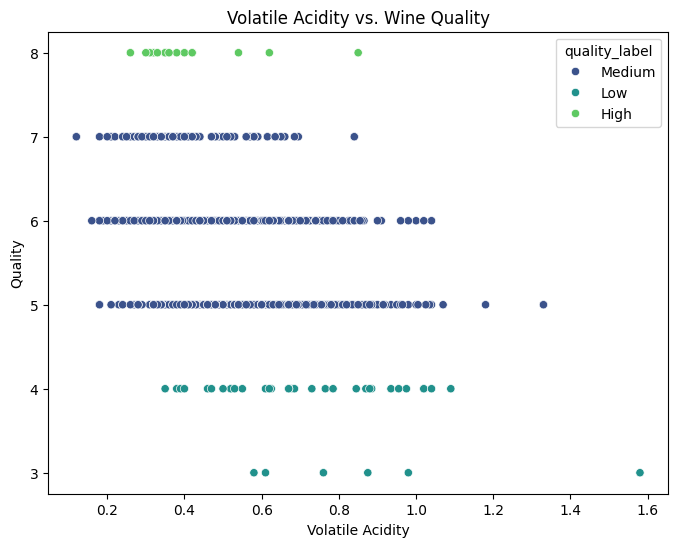

In [30]:
# Scatter plot for Volatile Acidity vs. Quality
plt.figure(figsize=(8, 6))
sns.scatterplot(x='volatile acidity', y='quality', data=df, hue='quality_label', palette='viridis')
plt.title('Volatile Acidity vs. Wine Quality')
plt.xlabel('Volatile Acidity')
plt.ylabel('Quality')
plt.show()


# Histogram: Residual Sugar Distribution by Quality
Histogram with KDE: Shows the distribution of residual sugar levels for each quality category, helping identify if sugar content influences wine quality.

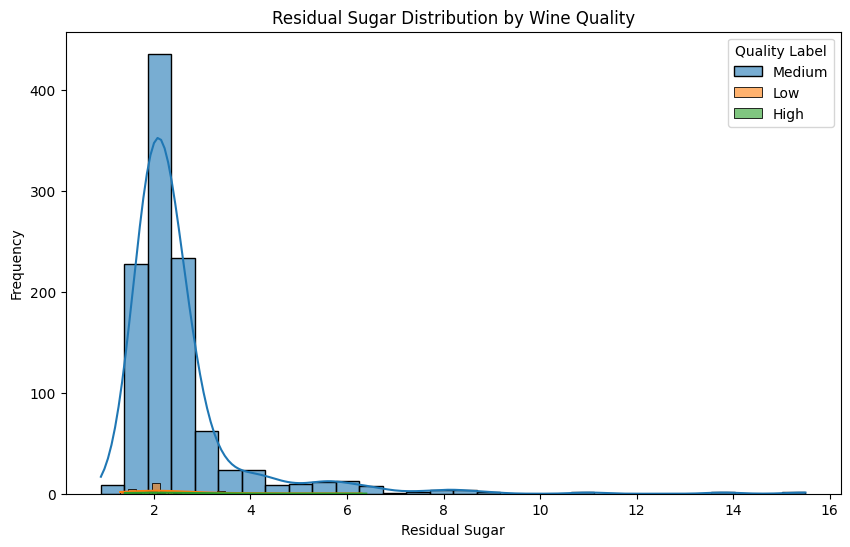

In [31]:
# Histogram of Residual Sugar by Quality
plt.figure(figsize=(10, 6))
for label in df['quality_label'].unique():
    subset = df[df['quality_label'] == label]
    sns.histplot(subset['residual sugar'], label=label, kde=True, bins=30, alpha=0.6)
plt.title('Residual Sugar Distribution by Wine Quality')
plt.xlabel('Residual Sugar')
plt.ylabel('Frequency')
plt.legend(title='Quality Label')
plt.show()


# Heatmap of p-Values (Optional Advanced Analysis)

To understand the statistical significance of each feature's relationship with quality:
p-Values: Indicates the significance of the correlation between each feature and wine quality. Lower p-values suggest stronger evidence against the null hypothesis (no correlation).

# Building a Predictive Model

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Features and target variable
X = df.drop(['quality', 'quality_label', 'quality_encoded'], axis=1)
y = df['quality']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")


Training set size: (914, 12)
Test set size: (229, 12)


Model Coefficients: Shows the weight assigned to each feature by the linear regression model, indicating their impact on wine quality prediction.

In [34]:
# Initialize and train the model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': lr.coef_})
print(coefficients)


                 Feature  Coefficient
0          fixed acidity     0.044828
1       volatile acidity    -1.326510
2            citric acid    -0.320227
3         residual sugar     0.004647
4              chlorides    -1.836925
5    free sulfur dioxide     0.002789
6   total sulfur dioxide    -0.002587
7                density   -32.767833
8                     pH    -0.284072
9              sulphates     0.953929
10               alcohol     0.271614
11                    Id    -0.000072


Mean Squared Error (MSE): Measures the average squared difference between actual and predicted values. Lower values indicate better performance.
R-squared (R2): Represents the proportion of variance in the dependent variable that's predictable from the independent variables. Values closer to 1 indicate a better fit. **bold text**

In [35]:
# Predict on the test set
y_pred = lr.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")


Mean Squared Error (MSE): 0.38
R-squared (R2): 0.31


Visualizing Actual vs. Predicted Quality
Scatter Plot with Diagonal Line: Compares actual wine quality scores with those predicted by the model. Points close to the diagonal line indicate accurate predictions.

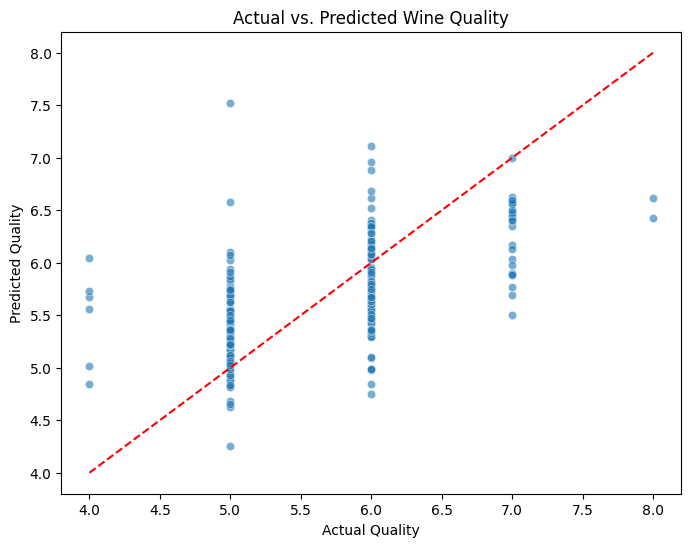

In [36]:
# Scatter plot of actual vs. predicted quality
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.title('Actual vs. Predicted Wine Quality')
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.show()
